# Load the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [2]:
path_to_data = "./data/TP_2.csv"
df = pd.read_csv(path_to_data)

# Display the first 20 rows and check the shape

In [3]:
df.head(20)

,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
0,2023-01-04 22:00:00,235.86.247.11,DDoS,196.107.124.176,5.0
1,2023-01-03 23:00:00,77.136.188.217,DDoS,139.107.85.198,5.0
2,2023-01-05 01:00:00,89.193.77.109,Phishing,57.104.181.159,2.0
3,2023-01-01 11:00:00,4.252.82.108,Phishing,32.5.147.45,2.0
4,2023-01-03 09:00:00,205.3.29.75,NaN,164.147.161.113,2.0
5,2023-01-03 01:00:00,11.91.126.70,Brute Force,209.215.241.17,15.0
6,2023-01-01 16:00:00,234.1.157.231,DDoS,197.122.130.239,NaN
7,2023-01-04 21:00:00,25.209.29.122,Brute Force,201.194.251.6,2.0
8,2023-01-01 00:00:00,64.48.200.180,SQL Injection,196.64.247.4,2.0
9,2023-01-01 07:00:00,125.96.188.100,SQL Injection,200.236.45.192,15.0


In [4]:
df.shape

(500, 5)

# Describe the columns and their types

In [5]:
df.dtypes

Timestamp               object
SourceIP                object
AttackType              object
TargetIP                object
AttackDurationHours    float64
dtype: object

In [6]:
df.describe(include='all')

,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
count,500,500,382,500,355.000000
unique,99,500,4,500,NaN
top,2023-01-02 12:00:00,224.52.42.123,Brute Force,110.92.248.81,NaN
freq,15,1,109,1,NaN
mean,NaN,NaN,NaN,NaN,7.735211
std,NaN,NaN,NaN,NaN,5.689993
min,NaN,NaN,NaN,NaN,2.000000
25%,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,15.000000


# Separate numerical and categorical variables

In [7]:
numeric_cols = df.select_dtypes(include=['float64']).columns.to_list()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Count the types
print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numeric columns: 1
Categorical columns: 4


In [8]:
numeric_cols

['AttackDurationHours']

In [9]:
categorical_cols

['Timestamp', 'SourceIP', 'AttackType', 'TargetIP']

# Plot the number of missing values per column (Bar plot)

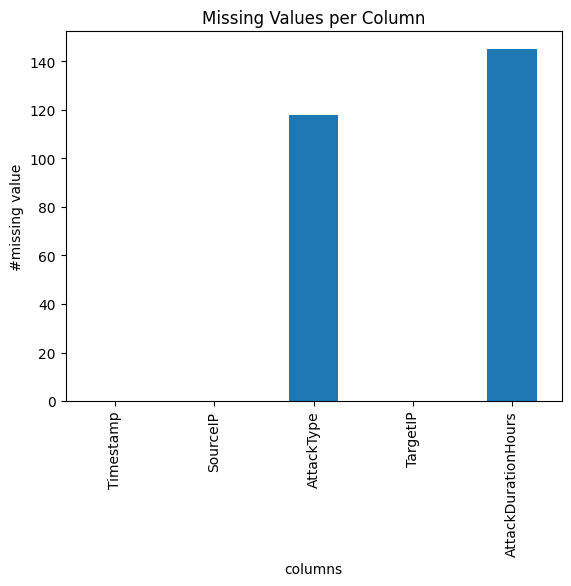

In [10]:
df.isnull().sum().plot(kind='bar', xlabel="columns", ylabel="#missing value")
                        #title="the number of missing value for each column")
plt.xticks(rotation=90)
plt.title("Missing Values per Column")
plt.show()

# Handling missing values for numerical features

In [11]:
missing = df[numeric_cols].isnull()
null_idx = [i for i,_ in missing.stack()[missing.stack()].index.tolist()]
null_idx[:10]

[6, 10, 12, 14, 16, 18, 21, 23, 28, 29]

In [12]:
mean = df[numeric_cols].mean()
median = df[numeric_cols].median()

mean, median

(AttackDurationHours    7.735211
 dtype: float64,
 AttackDurationHours    5.0
 dtype: float64)

## Replace missing values with the mean

In [13]:
# Replace missing numeric values with mean
mean_df = df.copy()
mean_imputer = SimpleImputer(strategy='mean')
mean_df[numeric_cols] = mean_imputer.fit_transform(mean_df[numeric_cols])

In [14]:
mean_df[numeric_cols].mean()

AttackDurationHours    7.735211
dtype: float64

In [15]:
mean_df[numeric_cols].isnull().sum()

AttackDurationHours    0
dtype: int64

In [16]:
mean_df[numeric_cols].loc[null_idx].head()

,AttackDurationHours
6,7.735211
10,7.735211
12,7.735211
14,7.735211
16,7.735211


## Replace missing values with the median

In [17]:
median_df = df.copy()
median_imputer = SimpleImputer(strategy='median')
median_df[numeric_cols] = median_imputer.fit_transform(median_df[numeric_cols])

In [18]:
median_df[numeric_cols].median()

AttackDurationHours    5.0
dtype: float64

In [19]:
median_df[numeric_cols].isnull().sum()

AttackDurationHours    0
dtype: int64

In [20]:
median_df[numeric_cols].loc[null_idx].head()

,AttackDurationHours
6,5.0
10,5.0
12,5.0
14,5.0
16,5.0


## Drop rows with missing values

In [21]:
drop_df =df.copy()
drop_df = drop_df.dropna(subset=numeric_cols)

In [22]:
drop_df.shape , df.shape, len(null_idx)

((355, 5), (500, 5), 145)

In [23]:
drop_df.shape[0] == df.shape[0] - len(null_idx)

True

In [24]:
drop_df[numeric_cols].isnull().sum()

AttackDurationHours    0
dtype: int64

## Replace missing values with a constant

In [25]:
constant_df = df.copy()
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
constant_df[numeric_cols] = constant_imputer.fit_transform(constant_df[numeric_cols])

In [26]:
constant_df[numeric_cols].loc[null_idx].head()

,AttackDurationHours
6,0.0
10,0.0
12,0.0
14,0.0
16,0.0


In [27]:
constant_df[numeric_cols].isnull().sum()

AttackDurationHours    0
dtype: int64

## Forward fill and backward fill methods

In [28]:
forward_df = df.copy()
# Forward fill method
forward_df[numeric_cols] = forward_df[numeric_cols].ffill()

In [29]:
forward_df[numeric_cols].isnull().sum()

AttackDurationHours    0
dtype: int64

In [30]:
forward_df[numeric_cols].loc[null_idx].head()

,AttackDurationHours
6,15.0
10,15.0
12,2.0
14,15.0
16,2.0


In [31]:
# Backward fill method
Backward_df = df.copy()
Backward_df[numeric_cols] = Backward_df[numeric_cols].bfill()


In [32]:
Backward_df[numeric_cols].isnull().sum()

AttackDurationHours    0
dtype: int64

In [33]:
Backward_df[numeric_cols].loc[null_idx].head()

,AttackDurationHours
6,2.0
10,2.0
12,15.0
14,2.0
16,2.0


## Replace missing values using interpolation

In [34]:
# Interpolate missing values
Interpolate_df = df.copy()
Interpolate_df[numeric_cols] = Interpolate_df[numeric_cols].interpolate()

In [35]:
Interpolate_df[numeric_cols].isnull().sum()

AttackDurationHours    0
dtype: int64

In [36]:
Interpolate_df[numeric_cols].loc[null_idx].head()

,AttackDurationHours
6,8.5
10,8.5
12,8.5
14,8.5
16,2.0


## Replace missing values using a regression model

In [37]:
data = df.copy()
# Create a copy of the original data
original_data = data.copy()

# Identify null values in 'AttackDurationHours'
null_val = list(data[data['AttackDurationHours'].isnull()].index)
not_null = [i for i in range(data.shape[0]) if i not in null_val]

le_attack = LabelEncoder()

# Encode the categorical feature
data['AttackType'] = le_attack.fit_transform(data['AttackType'].astype(str))

# Drop rows with missing AttackDurationHours
train_data = data.loc[not_null]

# Features and target
X = train_data[['AttackType']]
y = train_data['AttackDurationHours']

# Impute missing values in y using SimpleImputer
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the data after imputation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC()
}

# Dictionary to store predictions for each model
predictions = {}
Listeacc = []
Listmod = []
best_accuracy = 0
best_model_name = None
best_temp_data = None

# Train the model and predict missing AttackDurationHours values
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Prepare the features for prediction
    missing_data = data.loc[null_val]
    X_missing = missing_data[['AttackType']]

    # Predict the missing AttackDurationHours values
    predicted_attack_durations = model.predict(X_missing)

    # Store predictions in the dictionary
    predictions[model_name] = predicted_attack_durations

    # Fill the missing values in a copy of the original data for this model
    temp_data = original_data.copy()
    temp_data.loc[null_val, 'AttackDurationHours'] = predicted_attack_durations

    # Print the filled missing values for the current model
    print(f'Predicted AttackDurationHours for model {model_name}:')
    print(temp_data.loc[null_val].head())

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    Listeacc.append(accuracy)
    Listmod.append(model_name)
    print(f'Accuracy of {model_name}: {accuracy:.2f}')
    
    # Track the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_temp_data = temp_data

Predicted AttackDurationHours for model LogisticRegression:
              Timestamp         SourceIP     AttackType         TargetIP  \
6   2023-01-01 16:00:00    234.1.157.231           DDoS  197.122.130.239   
10  2023-01-02 18:00:00     62.72.67.250            NaN     37.87.161.60   
12  2023-01-03 22:00:00      2.99.63.225           DDoS    187.93.21.208   
14  2023-01-01 10:00:00  208.176.254.165  SQL Injection     1.102.134.40   
16  2023-01-01 10:00:00    139.43.122.89            NaN   221.148.46.200   

    AttackDurationHours  
6                   5.0  
10                 15.0  
12                  5.0  
14                 15.0  
16                 15.0  
Accuracy of LogisticRegression: 0.38
Predicted AttackDurationHours for model RandomForestClassifier:
              Timestamp         SourceIP     AttackType         TargetIP  \
6   2023-01-01 16:00:00    234.1.157.231           DDoS  197.122.130.239   
10  2023-01-02 18:00:00     62.72.67.250            NaN     37.87.161.60  

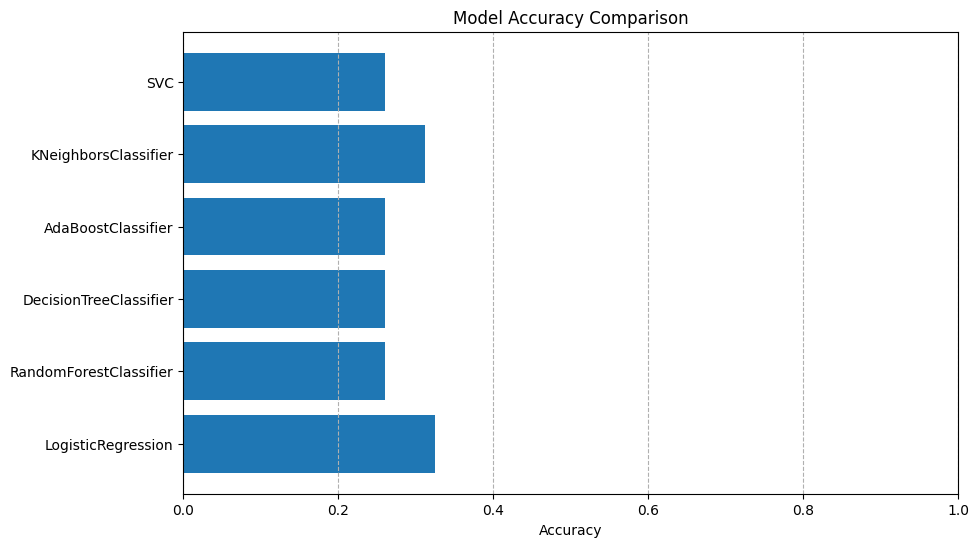

In [57]:
# Plotting the accuracy of each model
plt.figure(figsize=(10, 6))
plt.barh(Listmod, Listeacc)
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Setting the x-axis limits from 0 to 1
plt.grid(axis='x', linestyle='--')
plt.show()

In [39]:
# Print the best model details
print(f'\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.2f}')
# Optionally, display the best temp_data
best_temp_data.loc[null_val]


Best Model: LogisticRegression with Accuracy: 0.38


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
6,2023-01-01 16:00:00,234.1.157.231,DDoS,197.122.130.239,5.0
10,2023-01-02 18:00:00,62.72.67.250,NaN,37.87.161.60,15.0
12,2023-01-03 22:00:00,2.99.63.225,DDoS,187.93.21.208,5.0
14,2023-01-01 10:00:00,208.176.254.165,SQL Injection,1.102.134.40,15.0
16,2023-01-01 10:00:00,139.43.122.89,NaN,221.148.46.200,15.0
...,...,...,...,...,...
468,2023-01-03 03:00:00,45.191.5.4,SQL Injection,18.182.67.3,15.0
473,2023-01-02 08:00:00,83.34.3.244,DDoS,193.64.151.138,5.0
481,2023-01-04 17:00:00,14.77.30.106,Phishing,62.233.138.29,15.0
488,2023-01-01 13:00:00,75.139.95.219,SQL Injection,62.84.29.6,15.0


# Handling missing values for categorical features

In [40]:
missing = df[categorical_cols].isnull()
null_idx = [i for i,_ in missing.stack()[missing.stack()].index.tolist()]
null_idx[:10]

[4, 10, 15, 16, 22, 35, 40, 41, 42, 43]

In [41]:
df[categorical_cols].loc[null_idx].head()

,Timestamp,SourceIP,AttackType,TargetIP
4,2023-01-03 09:00:00,205.3.29.75,NaN,164.147.161.113
10,2023-01-02 18:00:00,62.72.67.250,NaN,37.87.161.60
15,2023-01-03 13:00:00,140.51.136.226,NaN,163.206.71.54
16,2023-01-01 10:00:00,139.43.122.89,NaN,221.148.46.200
22,2023-01-04 00:00:00,248.105.200.33,NaN,194.42.106.184


## Replace missing values with a constant

In [42]:
constant_df = df.copy()
constant_df[categorical_cols] = constant_df[categorical_cols].fillna('Unknown')

In [43]:
constant_df[categorical_cols].loc[null_idx].head()

,Timestamp,SourceIP,AttackType,TargetIP
4,2023-01-03 09:00:00,205.3.29.75,Unknown,164.147.161.113
10,2023-01-02 18:00:00,62.72.67.250,Unknown,37.87.161.60
15,2023-01-03 13:00:00,140.51.136.226,Unknown,163.206.71.54
16,2023-01-01 10:00:00,139.43.122.89,Unknown,221.148.46.200
22,2023-01-04 00:00:00,248.105.200.33,Unknown,194.42.106.184


## Forward fill and backward fill for categorical data

### Forward fill method


In [44]:
ffill_df = df.copy()
ffill_df[categorical_cols] = ffill_df[categorical_cols].ffill()

In [45]:
ffill_df[categorical_cols].loc[null_idx].head()

,Timestamp,SourceIP,AttackType,TargetIP
4,2023-01-03 09:00:00,205.3.29.75,Phishing,164.147.161.113
10,2023-01-02 18:00:00,62.72.67.250,SQL Injection,37.87.161.60
15,2023-01-03 13:00:00,140.51.136.226,SQL Injection,163.206.71.54
16,2023-01-01 10:00:00,139.43.122.89,SQL Injection,221.148.46.200
22,2023-01-04 00:00:00,248.105.200.33,DDoS,194.42.106.184


### Backward fill method

In [46]:
bfill_df = df.copy()
bfill_df[categorical_cols] = bfill_df[categorical_cols].bfill()

In [47]:
bfill_df[categorical_cols].loc[null_idx].head()

,Timestamp,SourceIP,AttackType,TargetIP
4,2023-01-03 09:00:00,205.3.29.75,Brute Force,164.147.161.113
10,2023-01-02 18:00:00,62.72.67.250,SQL Injection,37.87.161.60
15,2023-01-03 13:00:00,140.51.136.226,Phishing,163.206.71.54
16,2023-01-01 10:00:00,139.43.122.89,Phishing,221.148.46.200
22,2023-01-04 00:00:00,248.105.200.33,SQL Injection,194.42.106.184


## Replace missing values with the mode (most frequent value)

In [48]:
mode_df = df.copy()
mode_imputer = SimpleImputer(strategy='most_frequent')
mode_df[categorical_cols] = mode_imputer.fit_transform(mode_df[categorical_cols])

In [49]:
mode_df[categorical_cols].loc[null_idx].head()

,Timestamp,SourceIP,AttackType,TargetIP
4,2023-01-03 09:00:00,205.3.29.75,Brute Force,164.147.161.113
10,2023-01-02 18:00:00,62.72.67.250,Brute Force,37.87.161.60
15,2023-01-03 13:00:00,140.51.136.226,Brute Force,163.206.71.54
16,2023-01-01 10:00:00,139.43.122.89,Brute Force,221.148.46.200
22,2023-01-04 00:00:00,248.105.200.33,Brute Force,194.42.106.184


## Replace missing values with random sampling

In [50]:
random_df = df.copy()
for column in categorical_cols:
    non_null_values = random_df[column].dropna()
    random_df[column] = random_df[column].apply(lambda x: np.random.choice(non_null_values) if pd.isnull(x) else x)


In [51]:
random_df[categorical_cols].loc[null_idx].head()

,Timestamp,SourceIP,AttackType,TargetIP
4,2023-01-03 09:00:00,205.3.29.75,Brute Force,164.147.161.113
10,2023-01-02 18:00:00,62.72.67.250,Brute Force,37.87.161.60
15,2023-01-03 13:00:00,140.51.136.226,DDoS,163.206.71.54
16,2023-01-01 10:00:00,139.43.122.89,DDoS,221.148.46.200
22,2023-01-04 00:00:00,248.105.200.33,Brute Force,194.42.106.184


## Replace missing values using a regression model

In [52]:
data = df.copy()
# Create a copy of the original data
original_data = data.copy()

# Identify null values in 'AttackType'
null_val = list(data[data['AttackType'].isnull()].index)
not_null = [i for i in range(data.shape[0]) if i not in null_val]

le_attack = LabelEncoder()

data['AttackType'] = le_attack.fit_transform(data['AttackType'].astype(str))

# Drop rows with missing AttackType
train_data = data.loc[not_null]

# Features and target
X = train_data[['AttackDurationHours']]
y = train_data['AttackType']

# Impute missing values in X using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data after imputation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC()
}

# Dictionary to store predictions for each model
predictions = {}
Listeacc=[]
Listmod=[]
best_accuracy = 0
best_model_name = None
best_temp_data = None
# Train the model and predict missing AttackType values
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Prepare the features for prediction
    missing_data = data.loc[null_val]
    X_missing = missing_data[['AttackDurationHours']]

    # Impute missing values in X_missing using the same imputer fitted earlier
    X_missing = imputer.transform(X_missing)

    # Predict the missing AttackType values
    predicted_attack_types = model.predict(X_missing)

    # Map the predicted values back to original categories
    predicted_attack_types = le_attack.inverse_transform(predicted_attack_types)

    # Store predictions in the dictionary
    predictions[model_name] = predicted_attack_types

    # Fill the missing values in a copy of the original data for this model
    temp_data = original_data.copy()
    temp_data.loc[null_val, 'AttackType'] = predicted_attack_types

    # Print the filled missing values for the current model
    print(f'Predicted AttackType for model {model_name}:')
    print(temp_data.loc[null_val].head())

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    Listeacc.append(accuracy)
    Listmod.append(model_name)
    print(f'Accuracy of {model_name}: {accuracy:.2f}')
    # Track the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_temp_data = temp_data

Predicted AttackType for model LogisticRegression:
              Timestamp        SourceIP   AttackType         TargetIP  \
4   2023-01-03 09:00:00     205.3.29.75  Brute Force  164.147.161.113   
10  2023-01-02 18:00:00    62.72.67.250  Brute Force     37.87.161.60   
15  2023-01-03 13:00:00  140.51.136.226  Brute Force    163.206.71.54   
16  2023-01-01 10:00:00   139.43.122.89  Brute Force   221.148.46.200   
22  2023-01-04 00:00:00  248.105.200.33         DDoS   194.42.106.184   

    AttackDurationHours  
4                   2.0  
10                  NaN  
15                  2.0  
16                  NaN  
22                 15.0  
Accuracy of LogisticRegression: 0.32
Predicted AttackType for model RandomForestClassifier:
              Timestamp        SourceIP   AttackType         TargetIP  \
4   2023-01-03 09:00:00     205.3.29.75         DDoS  164.147.161.113   
10  2023-01-02 18:00:00    62.72.67.250  Brute Force     37.87.161.60   
15  2023-01-03 13:00:00  140.51.136.226    

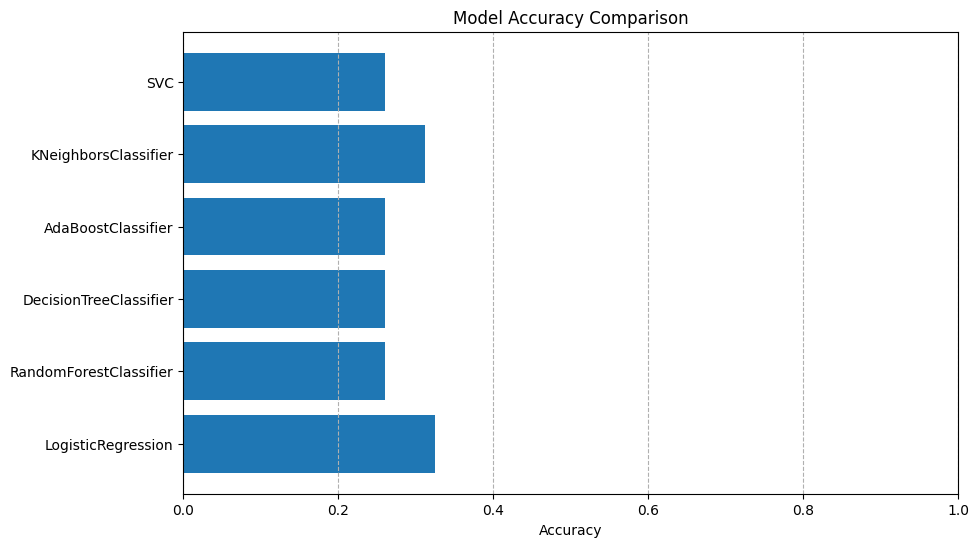

In [55]:
# Plotting the accuracy of each model
plt.figure(figsize=(10, 6))
plt.barh(Listmod, Listeacc)
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Setting the x-axis limits from 0 to 1
plt.grid(axis='x', linestyle='--')
plt.show()

In [54]:
# Print the best model details
print(f'\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.2f}')
# Optionally, display the best temp_data
best_temp_data.loc[null_val]


Best Model: LogisticRegression with Accuracy: 0.32


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
4,2023-01-03 09:00:00,205.3.29.75,Brute Force,164.147.161.113,2.0
10,2023-01-02 18:00:00,62.72.67.250,Brute Force,37.87.161.60,NaN
15,2023-01-03 13:00:00,140.51.136.226,Brute Force,163.206.71.54,2.0
16,2023-01-01 10:00:00,139.43.122.89,Brute Force,221.148.46.200,NaN
22,2023-01-04 00:00:00,248.105.200.33,DDoS,194.42.106.184,15.0
...,...,...,...,...,...
485,2023-01-03 03:00:00,5.230.126.18,Brute Force,241.61.68.178,2.0
486,2023-01-04 07:00:00,134.52.135.181,Brute Force,188.29.246.96,5.0
490,2023-01-03 05:00:00,192.34.97.123,DDoS,69.181.45.42,15.0
492,2023-01-03 07:00:00,131.210.231.193,Brute Force,35.252.163.1,2.0
